# iris 데이터 DecisionTreeClassifier

## 데이터 전처리

#### 불러오기

In [1]:
import seaborn as sns

In [4]:
iris = sns.load_dataset('iris')

print(iris)
print(iris.shape)
print(type(iris))
print(iris.info())

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
(150, 5)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns

#### x y 데이터 나누기

In [6]:
X_data = iris.iloc[:,:4]
y_data = iris.iloc[:,4]

print(X_data)
print(X_data.shape)
print(type(X_data))

print(y_data)
print(y_data.shape)
print(type(y_data))


     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
(150, 4)
<class 'pandas.core.frame.DataFrame'>
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object
(150

#### 클래스 열 라벨 인코딩

In [8]:
 from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_data = le.fit_transform(y_data)
#le.classes_(y_data)

print(y_data)
print(y_data.shape)
print(type(y_data))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150,)
<class 'numpy.ndarray'>


#### train test 셋 나누기

In [9]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=123)


print(x_train)
print(x_train.shape)
print(type(x_train))

print(y_train)
print(y_train.shape)
print(type(y_train))


     sepal_length  sepal_width  petal_length  petal_width
114           5.8          2.8           5.1          2.4
136           6.3          3.4           5.6          2.4
53            5.5          2.3           4.0          1.3
19            5.1          3.8           1.5          0.3
38            4.4          3.0           1.3          0.2
..            ...          ...           ...          ...
17            5.1          3.5           1.4          0.3
98            5.1          2.5           3.0          1.1
66            5.6          3.0           4.5          1.5
126           6.2          2.8           4.8          1.8
109           7.2          3.6           6.1          2.5

[105 rows x 4 columns]
(105, 4)
<class 'pandas.core.frame.DataFrame'>
[2 2 1 0 0 2 0 0 1 1 1 1 2 1 2 0 2 1 0 0 2 1 2 2 0 1 1 2 0 2 1 1 0 2 2 0 0
 1 1 2 0 0 1 0 1 2 0 2 0 0 1 0 0 1 2 1 1 1 0 0 1 2 0 0 1 1 1 2 1 1 1 2 0 0
 1 2 2 2 2 0 1 0 1 1 0 1 2 1 2 2 0 1 0 2 2 1 1 2 2 1 0 1 1 2 2]
(105,)
<class 'nump

## 분류나무 모델 학습 


라이브러리 로드 방법 2개

In [15]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn import tree 도 가능
# clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=1)

- criterion='gini' : 지니 인덱스를 사용하는 Cart를 사용한다
- criterion='entropy' : 엔트로피 사용하는 c4.5 모델
- max_depth=5 : 최대 학습 깊이 설정

In [16]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=1) 
#clf = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=1) 

clf.fit(x_train,y_train)
#cross_val_score(clf, iris.data, iris.target, cv=10)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

## 모델 성능 평가

#### 예측값 생성

In [17]:
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

print(y_train_pred)
print(y_train_pred.shape)
print(type(y_train_pred))
print(y_test_pred)
print(y_test_pred.shape)
print(type(y_test_pred))

[2 2 1 0 0 2 0 0 1 1 1 1 2 1 2 0 2 1 0 0 2 1 2 2 0 1 1 2 0 2 1 1 0 2 2 0 0
 1 1 2 0 0 1 0 1 2 0 2 0 0 1 0 0 1 2 1 1 1 0 0 1 2 0 0 1 1 1 2 1 1 1 2 0 0
 1 2 2 2 2 0 1 0 1 1 0 1 2 1 2 2 0 1 0 2 2 1 1 2 2 1 0 1 1 2 2]
(105,)
<class 'numpy.ndarray'>
[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 1 0 2 0 0 0 2 2 0 2 1 0 0 1 1 2
 0 0 1 1 0 2 2 2]
(45,)
<class 'numpy.ndarray'>


#### 정확도 검사

In [18]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))

print(accuracy_score(y_test, y_test_pred))

1.0
0.9555555555555556


## 트리 시각화

- tree.plot_tree(clf.fit(x_train,y_train))  

In [19]:
from sklearn import tree

- value 값은 각 클래스의 해당하는 데이터 수

[Text(697.5, 597.96, 'X[3] <= 0.8\ngini = 0.663\nsamples = 105\nvalue = [32, 40, 33]'),
 Text(558.0, 489.24, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]'),
 Text(837.0, 489.24, 'X[3] <= 1.75\ngini = 0.495\nsamples = 73\nvalue = [0, 40, 33]'),
 Text(558.0, 380.52000000000004, 'X[2] <= 5.35\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(418.5, 271.8, 'X[0] <= 5.0\ngini = 0.049\nsamples = 40\nvalue = [0, 39, 1]'),
 Text(279.0, 163.07999999999998, 'X[3] <= 1.35\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(139.5, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(418.5, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(558.0, 163.07999999999998, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(697.5, 271.8, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(1116.0, 380.52000000000004, 'X[2] <= 4.85\ngini = 0.062\nsamples = 31\nvalue = [0, 1, 30]'),
 Text(976.5, 271.8, 'X[1] <= 3.0\ngini = 0.5\nsamples = 2\nvalue = [0, 

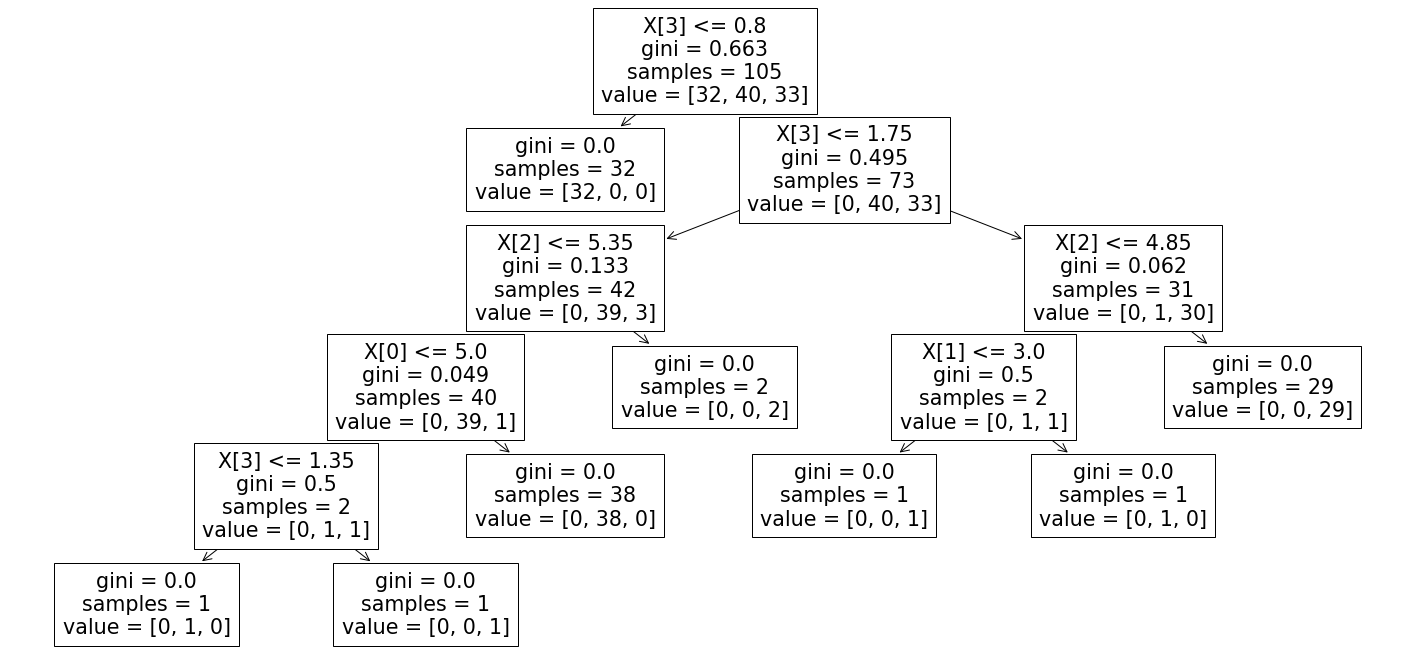

In [22]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(25,12))
tree.plot_tree(clf.fit(x_train,y_train))  